In [1]:
import numpy as np
import random as rn
import matplotlib.pylab as plt
from operator import itemgetter
import time
import sys

In [2]:
def gen_points(n, x, y):
    plist = []
    for i in range(n):
        plist.append([rn.randint(0,x), rn.randint(0,y)])
    return plist

In [3]:
num_data = 5
xmax = 100
ymax = 100

random_points = gen_points(num_data, xmax, ymax)
# random_points = [[1, 6], [1, 8], [3, 0], [5, 2], [7, 4]]

In [4]:
asdfasfasf

NameError: name 'asdfasfasf' is not defined

In [5]:
print(random_points)

[[98, 10], [96, 10], [49, 70], [0, 24], [13, 26]]


In [11]:
import scipy.spatial as sp

kek = sp.KDTree(random_points)
print(kek.query([10, 10]))

(16.278820596099706, 4)


In [ ]:
class Node():
    def __init__(self, axis, value, point=None, leftChild=None, rightChild=None):
        self.axis = axis                # Splitting Axis
        self.value = value              # Median Value
        self.point = point              # Holds a point if left/right are null
        self.left = leftChild           # Left subtree
        self.right = rightChild          # Right subtree

In [ ]:
def kdtree(points, depth=0):
    if not points:
        return None
    
    k = len(points[0])
    axis = np.mod(depth, k)

    points.sort(key=itemgetter(axis))
    median = len(points) // 2
    value = points[median][axis]
    # if np.mod(len(points), 2) == 0 or len(points) == 1:
    #     median = len(points) // 2
    # else:
    #     median = (len(points)//2) + 1
    # print(len(points), median)

    if len(points[:median])==0 and len(points[median+1:])==0:
        # print(axis, points[median][axis], points[median])
        return Node(axis, value, leftChild=None, rightChild=None, point=points[median])
    else:
        return Node(axis, value, leftChild=kdtree(points[:median], depth+1), rightChild=kdtree(points[median+1:], depth+1), point=points[median])

In [ ]:
print(random_points)

[[44, 41], [91, 70], [5, 64], [13, 15], [12, 17], [21, 40], [62, 80], [98, 14], [48, 78], [100, 82], [3, 58], [83, 60], [78, 76], [59, 35], [44, 26], [9, 83], [57, 39], [88, 16], [37, 16], [24, 66], [19, 100], [71, 67], [59, 87], [43, 55], [16, 37], [16, 65], [34, 8], [33, 15], [74, 66], [24, 71], [21, 29], [81, 19], [86, 48], [32, 44], [81, 11], [41, 76], [100, 35], [4, 24], [82, 95], [29, 41], [94, 49], [97, 81], [0, 57], [65, 91], [20, 18], [40, 4], [47, 29], [98, 16], [62, 13], [54, 30]]


In [ ]:
root = kdtree(random_points)

In [ ]:
refPoint = random_points[-1]
refDist = 1e1000

In [ ]:
# Query Point
query = [1, 4]

In [ ]:
def distance(A, B):
    return np.sqrt((A[0]-B[0])**2+(A[1]-B[1])**2)

In [ ]:
def bruteForce(q, random_points):
    distVec = []
    for i in range(len(random_points)):
        distVec.append(np.sqrt((q[0]-random_points[i][0])**2+(q[1]-random_points[i][1])**2))
    minDistInd = distVec.index(np.min(distVec))
    return distVec[minDistInd], random_points[minDistInd]

In [ ]:
def NNS(q, n, p, w):
    # q: Query Point (Point of Interest)
    # n: kd tree
    # p: Reference Point
    # w: Reference Distance
    if n.left is None and n.right is None:
        dist = distance(q, n.point)
        if dist < w:
            w = dist
            p = n.point
        return w, p
    else:
        if q[n.axis] <= n.value:
            search_left = True
        else:
            search_left = False
        
        # print(n.axis, q[n.axis], n.value)
        # print(search_left)
        
        if search_left:
                return NNS(q, n.left, p, w)
        else:
            print(q[n.axis]-refDist > n.value)
            return NNS(q, n.right, p, w)
            
# nearDist, nearPoint = NNS(q=query, n=root, p=refPoint, w=refDist)
# print(nearDist, nearPoint)

In [ ]:
start = time.time()
nearDist, nearPoint = NNS(q=query, n=root, p=refPoint, w=refDist)
print(nearDist, nearPoint)

# Brute Force
nearDist_BF, nearPoint_BF = bruteForce(query, random_points)
print(bruteForce(query, random_points))

print(distance(nearPoint, query), distance(nearPoint_BF, query))

17.029386365926403 [12, 17]
(16.278820596099706, [13, 15])
17.029386365926403 16.278820596099706


(-5.0, 105.0, -0.8000000000000007, 109.2)

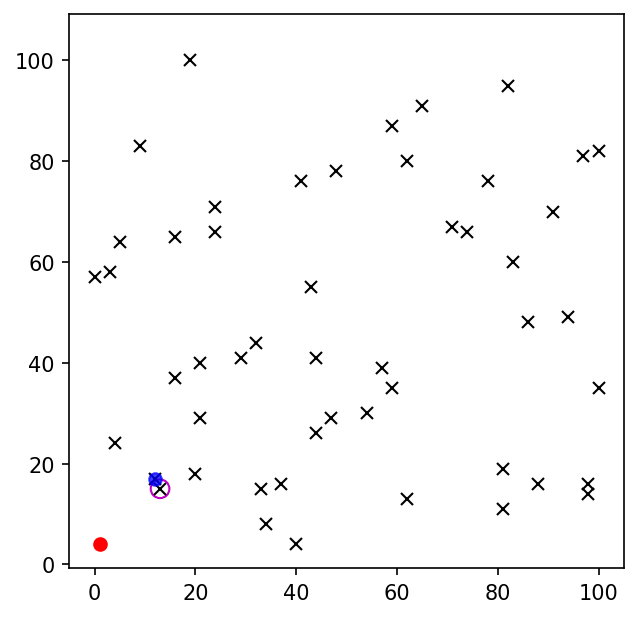

In [ ]:
fig = plt.figure(dpi=150)
for rpi in random_points:
    plt.plot(rpi[0], rpi[1], 'kx')
plt.plot(query[0], query[1], 'or')
plt.plot(nearPoint[0], nearPoint[1], 'ob', alpha=0.75)
plt.scatter(nearPoint_BF[0], nearPoint_BF[1], s=80, facecolors='none', edgecolors='m')
plt.axis('square')

In [ ]:
asdfasdfasfasfd

NameError: name 'asdfasdfasfasfd' is not defined

In [ ]:
nSampleList = [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 1e2, 5e2, 1e3, 5e3, 1e4]
compTimeDict_NNS = {}
compTimeDict_BF = {}
for i in range(len(nSampleList)):
    currSampleNumber = nSampleList[i]
    xmax = 1000
    ymax = 1000
    random_points = gen_points(currSampleNumber, xmax, ymax)

    compTimeDict_NNS[str(i)] = []
    compTimeDict_BF[str(i)] = []
    for j in range(1e3):
        print(currSampleNumber+str(j))
        start=time.time()
        nearDist, nearPoint = NNS(q=query, n=root, p=refPoint, w=refDist)
        compTimeDict_NNS[str(i)].append(time.time()-start)

        start=time.time()
        nearDist, nearPoint = bruteForce(q=query, random_points=random_points)
        compTimeDict_BF[str(i)].append(time.time()-start)